# Image Processing Using Numpy

In [1]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

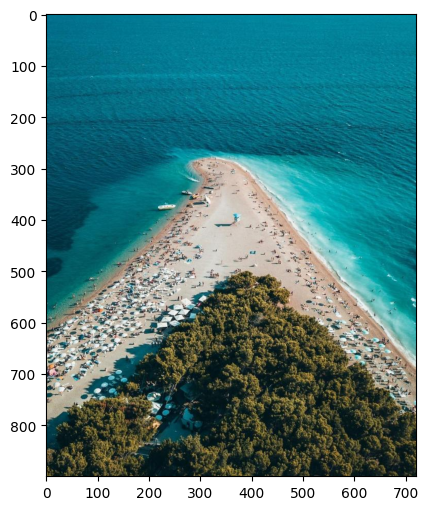

In [5]:
img = np.array(Image.open('beach.jpg'))  # reading the image
plt.figure(figsize=(6,6))  # configuring the plot to visualize the image
plt.imshow(img)  # ploting the image to the console

<Axes: >

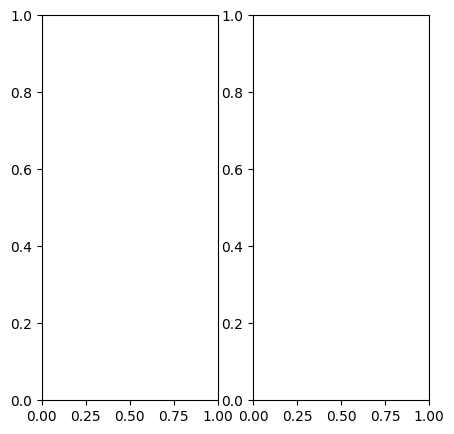

In [17]:
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(1, 2, 1)
fig.add_subplot(1, 2, 2)
#fig.add_subplot(1, 2, 3)

Text(0.5, 1.0, 'rotated')

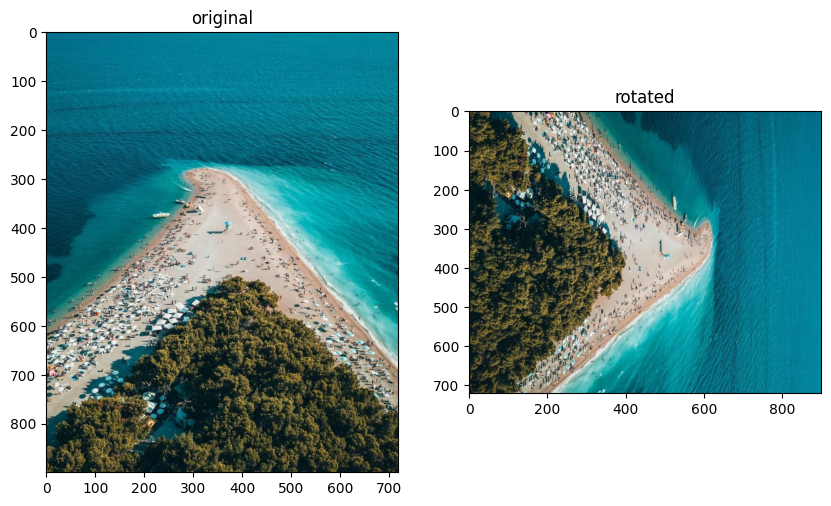

In [6]:
# rotate an image by 90 degrees in a clockwise direction.
degrees = 90
img = np.array(Image.open('beach.jpg'))
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

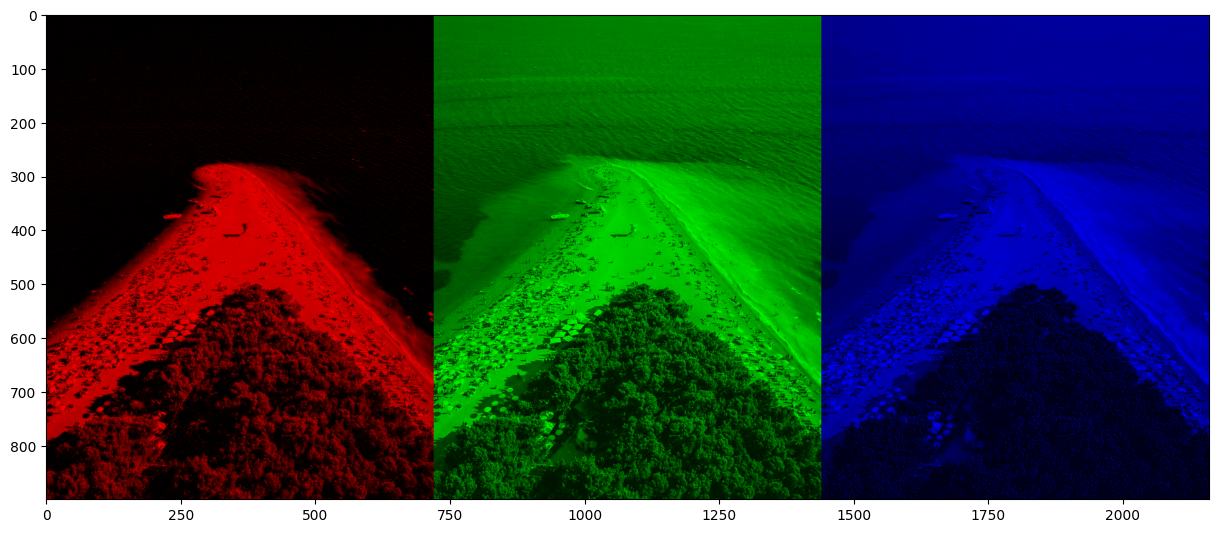

In [18]:
# Visualizing RGB Channels

img = np.array(Image.open('beach.jpg'))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

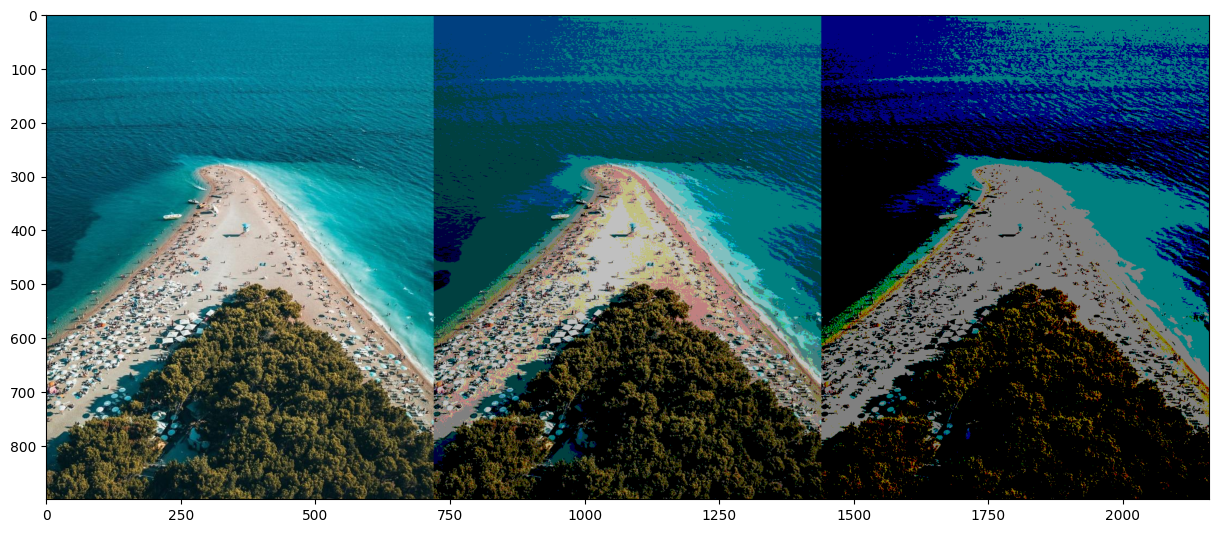

In [20]:
# Color Reduction
img = np.array(Image.open('beach.jpg'))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

Text(0.5, 1.0, 'Trimmed')

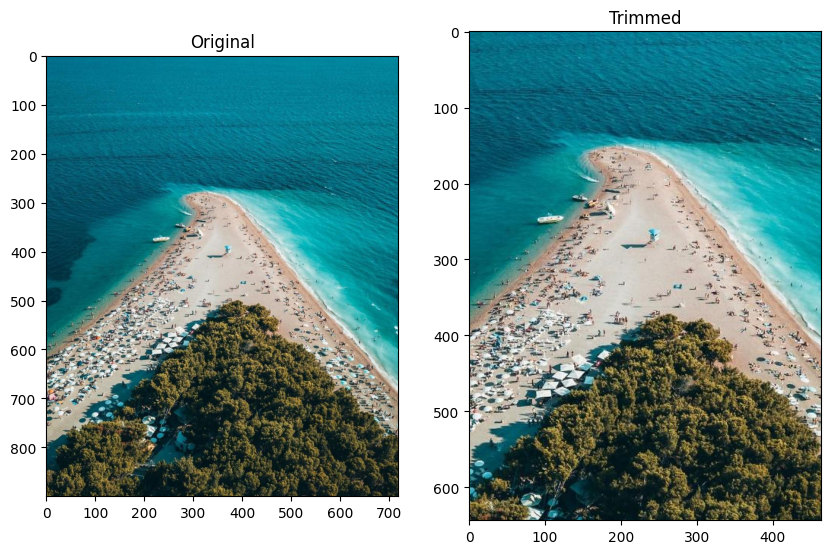

In [9]:
# Trim Image

img = np.array(Image.open('beach.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[128:-128, 128:-128, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

Text(0.5, 1.0, 'Pasted with slice')

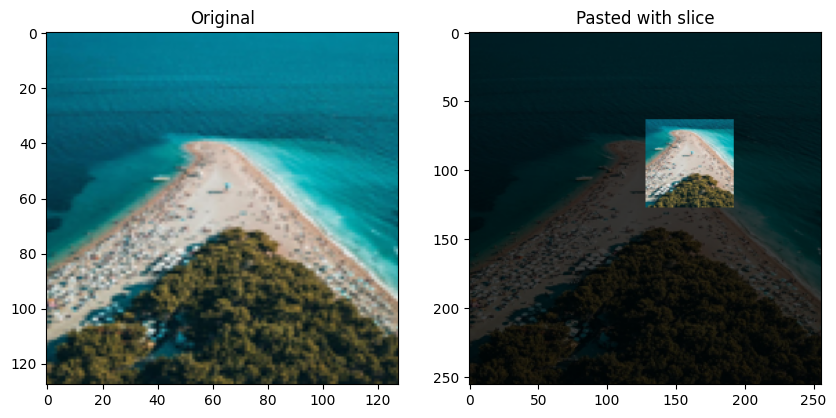

In [10]:
# Pasting With Slice

src = np.array(Image.open('beach.jpg').resize((128, 128)))
dst = np.array(Image.open('beach.jpg').resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')


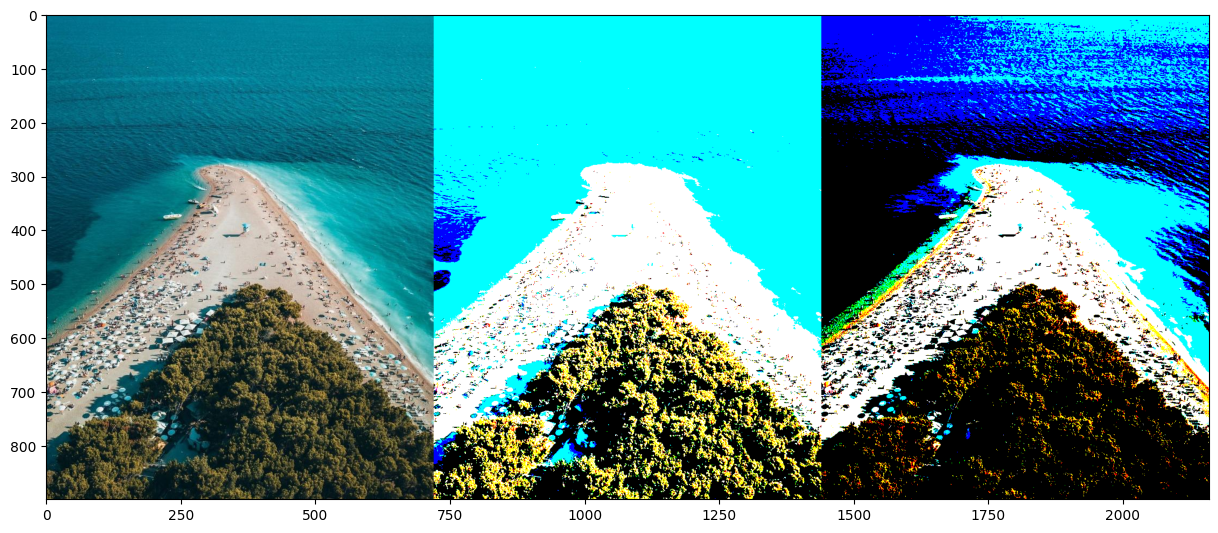

In [11]:
# Binarize Image
# We can also binarize an Image using Numpy. Check the below code to binarize an image.

img = np.array(Image.open('beach.jpg'))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

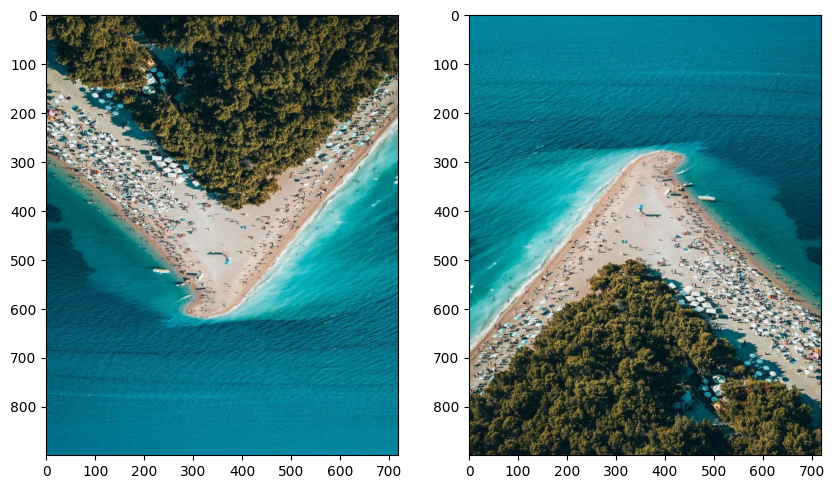

In [12]:
# An Alternate way to Flip an Image

img = np.array(Image.open('beach.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.flipud(img))
fig.add_subplot(1, 2, 2)
plt.imshow(np.fliplr(img))


uint8


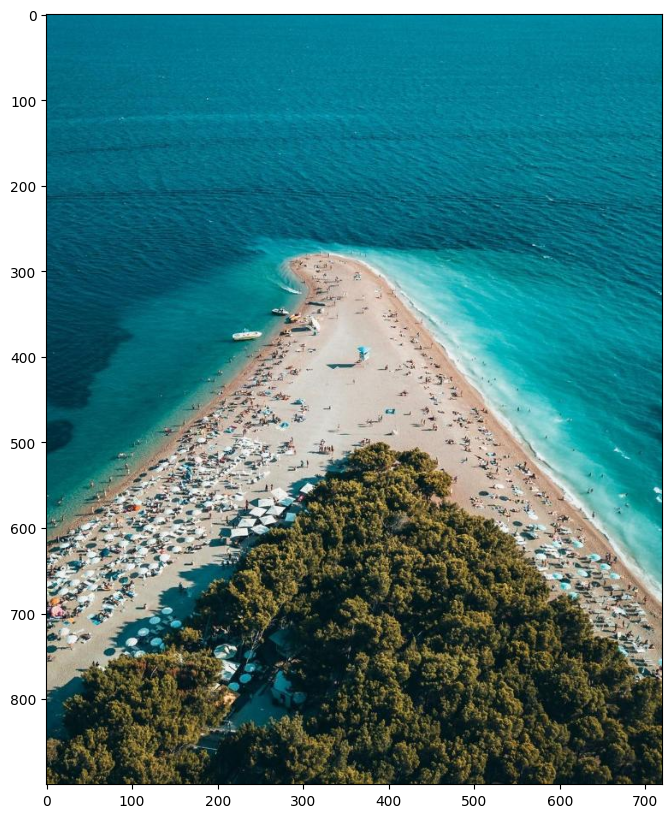

In [21]:
# Blending Two Images

img = np.array(Image.open('beach.jpg'))
img0 = np.array(Image.open('beach.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

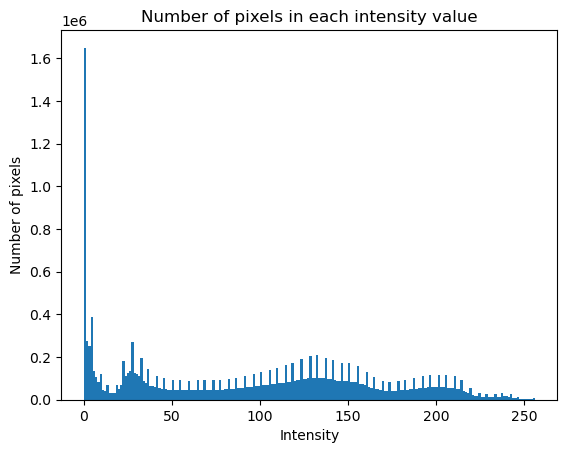

In [15]:
# Histogram For Pixel Intensity

img = np.array(Image.open('beach.jpg'))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()